**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

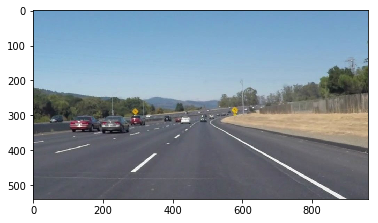

In [3]:
img = mpimg.imread('test.jpg')
plt.imshow(img)

### Test OpenCV

In [4]:
import cv2

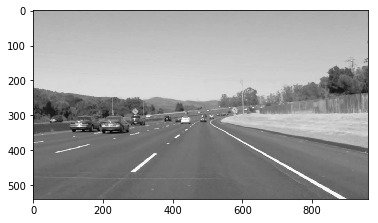

In [5]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='Greys_r')

## Test TensorFlow

In [6]:
import tensorflow as tf

In [7]:
with tf.Session() as sess:
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    # Should be 3
    print("1 + 2 = {}".format(sess.run(c)))

1 + 2 = 3


## Test Moviepy

In [8]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

In [9]:
new_clip_output = 'test_output.mp4'
test_clip = VideoFileClip("test.mp4")
new_clip = test_clip.fl_image(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2YUV)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


100%|██████████| 251/251 [00:24<00:00, 10.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 

CPU times: user 1.62 s, sys: 240 ms, total: 1.86 s
Wall time: 26.7 s


In [10]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

### Creating a function to detect lines

In [26]:
# Declaring all parameters
kernel_size = 3
low_threshold = 50
high_threshold = 150
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10 #minimum number of pixels making up a line
max_line_gap = 10

In [27]:
# Declaring and defining the function
def detectlines(image, kernel_size, low_threshold, high_threshold, rho, theta, threshold, min_line_length, max_line_gap):
    # 1. Convert to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # 2. Gaussian Blur
    kernel_size = kernel_size
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
    
    # 3. Canny to detect edge dots
    low_threshold = low_threshold
    high_threshold = high_threshold
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # 4. Mask with a polygon
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 128   
    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[[240,670],[1100, 670], [750, 450], [600, 450]]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # 5. Applying Hough Transform on masked_edges
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = rho # distance resolution in pixels of the Hough grid
    theta = theta # angular resolution in radians of the Hough grid
    threshold = threshold     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = min_line_length #minimum number of pixels making up a line
    max_line_gap = max_line_gap   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    
    output = cv2.addWeighted(image, 1, line_image, 1, 0)
    return output

### Creating the output

In [28]:
new_clip_output = 'output.mp4'
new_clip = test_clip.fl_image(lambda x: detectlines(x, kernel_size, low_threshold, high_threshold, rho, theta, threshold, min_line_length, max_line_gap)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|██████████| 251/251 [00:32<00:00,  7.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 

CPU times: user 4.64 s, sys: 240 ms, total: 4.88 s
Wall time: 35.8 s


In [29]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [15]:
  f1 =  test_clip.get_frame(1)

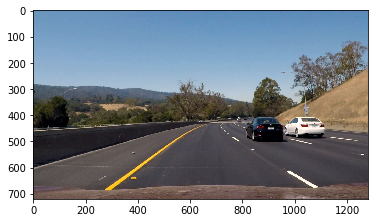

In [16]:
plt.imshow(f1)

In [17]:
test_clip.size

[1280, 720]